#G2M Insight for Cab Investment Firm


XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

Project delivery:

You have been provided with multiple data sets that contains information on 2 cab companies. Each file (data set) provided represents different aspects of the customer profile. XYZ is interested in using your actionable insights to help them identify the right company to make their investment.

##Basic Package Installation

In [52]:
! pip install hvplot
! pip install holoviews hvplot

##Import useful packages

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gdown
import plotly.express as px
import hvplot.pandas
import holoviews as hv
import panel as pn
pn.extension(comms='colab')

In [54]:
#importing the dataset from drive
gdown.download_folder('https://drive.google.com/drive/folders/1peKiUDP95iv7IjBn0T5jcRHDW7Ezu9OQ', quiet=True)

['/content/G2M datasets/Cab_Data.csv',
 '/content/G2M datasets/City.csv',
 '/content/G2M datasets/Customer_ID.csv',
 '/content/G2M datasets/Transaction_ID.csv']

##Exploratory Data Analysis

In [55]:
#load the datasets
cab_data = pd.read_csv('/content/G2M datasets/Cab_Data.csv')
customer_data = pd.read_csv( '/content/G2M datasets/Customer_ID.csv')
transaction_data = pd.read_csv('/content/G2M datasets/Transaction_ID.csv')
city_data = pd.read_csv('/content/G2M datasets/City.csv')

In [56]:
# View the first few rows of each data set
print('Cab_Data\n',cab_data.head())
print('Customer_Data\n',customer_data.head())
print('Transaction_Data\n',transaction_data.head())
print('City_data\n',city_data.head())

Cab_Data
    Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776  
Customer_Data
    Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536
Transaction_Data
    Transaction ID  Customer ID Payment

In [57]:
# Rename the column name Users and Population in City_data dataset
city_data = city_data.rename(columns={'Users': 'No: of Cab Users in the city'})
city_data = city_data.rename(columns={'Population': 'Population of the city'})



### Insights:
Users feature of city_data dataset is treated as number of cab users in the city. I have assumed that this can be other cab users as well (including Yellow and Pink cab)

In [58]:
# Check data types and missing values of each data set
print('Cab_Data')
print('\n')
print(cab_data.info())
print('\n\n')

print('Customer_Data')
print('\n')
print(customer_data.info())
print('\n\n')

print('Transaction_Data')
print('\n')
print(transaction_data.info())
print('\n\n')

print('City_Data')
print('\n')
print(city_data.info())

Cab_Data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB
None



Customer_Data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171

In [59]:
# Check if there is  null values in each data set
print('Cab_Data')
print('\n')
print(cab_data.isna().sum())
print('\n\n')

print('Customer_Data')
print('\n')
print(customer_data.isna().sum())
print('\n\n')

print('Transaction_Data')
print('\n')
print(transaction_data.isna().sum())
print('\n\n')

print('City_Data')
print('\n')
print(city_data.isna().sum())

Cab_Data


Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64



Customer_Data


Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64



Transaction_Data


Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64



City_Data


City                            0
Population of the city          0
No: of Cab Users in the city    0
dtype: int64


In [60]:
#check if there is duplicate rows on each dataset
print('Duplicate rows in the dataset Cab_data is ',cab_data.duplicated().sum())
#check if there is duplicate rows on each dataset
print('Duplicate rows in the dataset Transaction_data is ',transaction_data.duplicated().sum())
#check if there is duplicate rows on each dataset
print('Duplicate rows in the dataset Customer_data is ',customer_data.duplicated().sum())
#check if there is duplicate rows on each dataset
print('Duplicate rows in the dataset City_data is ',city_data.duplicated().sum())

Duplicate rows in the dataset Cab_data is  0
Duplicate rows in the dataset Transaction_data is  0
Duplicate rows in the dataset Customer_data is  0
Duplicate rows in the dataset City_data is  0


###Insights:
From the above steps, we can understand that there are no null values and duplicate rows on each dataset

##Data Integration

###Findings:
* Here we merge the datasets 'cab_data' and 'transaction_data' with the
'Transaction ID' column and the customer_data dataset will be merged to it with the 'Customer ID' column. We will form a new dataset 'final_cab_data' with these merged dataset.

* Here I'm not merging city_data dataset to 'final_cab_data' dataset as this won't give any useful insights. Merging makes the values of 'population of the city' and 'no: of cab users in the city' repeated each time in the final_cab _data dataset against the city column








In [61]:
#Merge the datasets using Customer_ID and Transaction_ID

#merged_data = pd.merge(cab_data, transaction_data, on="Transaction ID")
#final_cab_data = pd.merge(merged_data, customer_data, on="Customer ID")

merged_data = cab_data.merge(transaction_data, on="Transaction ID")
final_cab_data = merged_data.merge(customer_data, on="Customer ID")
#final_cab_data = merged_data.merge(city_data, on="City")
#Merging city_data dataset give no useful insights. It makes the values of 'population' and 'no: of cab users in the city' repeated each time in the final_cab _data dataset against the city column


In [62]:
print(final_cab_data)


        Transaction ID  Date of Travel     Company            City  \
0             10000011           42377    Pink Cab      ATLANTA GA   
1             10351127           43302  Yellow Cab      ATLANTA GA   
2             10412921           43427  Yellow Cab      ATLANTA GA   
3             10000012           42375    Pink Cab      ATLANTA GA   
4             10320494           43211  Yellow Cab      ATLANTA GA   
...                ...             ...         ...             ...   
359387        10439790           43107  Yellow Cab      SEATTLE WA   
359388        10439799           43103  Yellow Cab  SILICON VALLEY   
359389        10439838           43104  Yellow Cab       TUCSON AZ   
359390        10439840           43106  Yellow Cab       TUCSON AZ   
359391        10439846           43104  Yellow Cab       TUCSON AZ   

        KM Travelled  Price Charged  Cost of Trip  Customer ID Payment_Mode  \
0              30.45         370.95      313.6350        29290         Card   
1

In [63]:
print(final_cab_data.head())

   Transaction ID  Date of Travel     Company        City  KM Travelled  \
0        10000011           42377    Pink Cab  ATLANTA GA         30.45   
1        10351127           43302  Yellow Cab  ATLANTA GA         26.19   
2        10412921           43427  Yellow Cab  ATLANTA GA         42.55   
3        10000012           42375    Pink Cab  ATLANTA GA         28.62   
4        10320494           43211  Yellow Cab  ATLANTA GA         36.38   

   Price Charged  Cost of Trip  Customer ID Payment_Mode Gender  Age  \
0         370.95      313.6350        29290         Card   Male   28   
1         598.70      317.4228        29290         Cash   Male   28   
2         792.05      597.4020        29290         Card   Male   28   
3         358.52      334.8540        27703         Card   Male   27   
4         721.10      467.1192        27703         Card   Male   27   

   Income (USD/Month)  
0               10813  
1               10813  
2               10813  
3                923

In [64]:
# Check data types and summary statistics
print(final_cab_data.info())
print(final_cab_data.describe())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  int64  
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Customer ID         359392 non-null  int64  
 8   Payment_Mode        359392 non-null  object 
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income (USD/Month)  359392 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 35.6+ MB
None
       Transaction ID  Date of Travel   KM Travelled  Price Charged  \
count    3.593920e+05   359392.000000  359392.0000

###Findings:
The "Date of Travel" column does not contain current date values and does not provide meaningful information for my analysis, So I choose to remove this column from the dataset.


In [65]:
#The "Date of Travel" column does not contain current date values and does not provide meaningful information for my analysis, So I choose to remove this column from the dataset.
final_cab_data = final_cab_data.drop('Date of Travel', axis=1)

In [66]:
# Check for missing values
print(final_cab_data.isnull().sum())    #or this expression final_cab_data.isna().sum())
#Check for duplicates
print('Duplicate rows in the dataset Final_cab_data is ', final_cab_data.duplicated().sum())

Transaction ID        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64
Duplicate rows in the dataset Final_cab_data is  0


###Insights:
There are no duplicate rows and null values in the 'final_cab_data' dataset.


##Data Visualization

Check total profit for each cabs, total rvenue for each cabs, Km travelled for each cabs, city wise also
Total no of trips for each cabs. city wise total number of rides

**Check the Total number of rides for each cab companies**

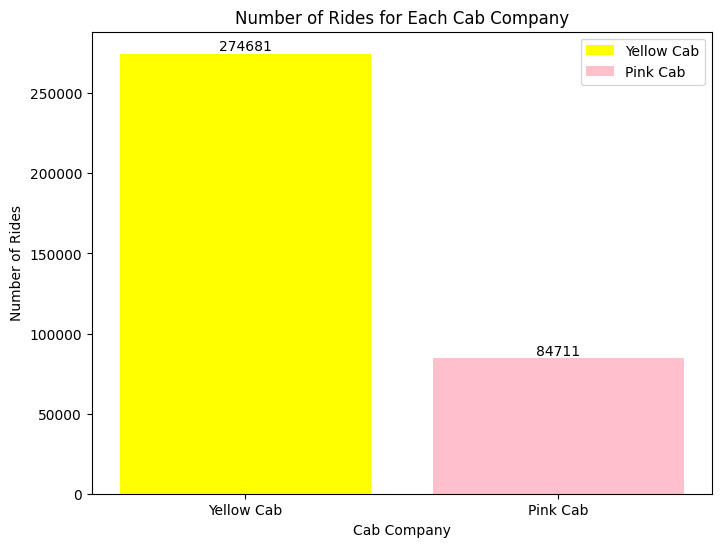

In [67]:
# Plot a Histogram to Check the Total number of rides for each cab companies
# Group the data by 'Company' and count the number of rides
ride_counts = final_cab_data['Company'].value_counts()

# Define labels for the legend
legend_labels = ['Yellow Cab', 'Pink Cab']

# Create a histogram
plt.figure(figsize=(8, 6))
bars=plt.bar(ride_counts.index, ride_counts.values, color=['yellow', 'pink'])
plt.xlabel('Cab Company')
plt.ylabel('Number of Rides')
plt.title('Number of Rides for Each Cab Company')

# Add labels (indicators) above the bars
for bar, count in zip(bars, ride_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2, count, str(count), ha='center', va='bottom')

# Add legends
plt.legend(bars, legend_labels)
plt.show()

In [68]:
# Plot an Interactive Histogram
# Check the Total number of rides for each cab companies


# Group the data by 'Company' and count the number of rides
ride_counts = final_cab_data['Company'].value_counts().reset_index()
ride_counts.columns = ['Company', 'Number of Rides']

# Create an interactive histogram using plotly with color mapping
color_mapping = {'Yellow Cab': 'yellow', 'Pink Cab': 'pink'}
fig = px.bar(ride_counts, x='Company', y='Number of Rides', color='Company',
             color_discrete_map=color_mapping,
             title='Number of Rides for Each Cab Company')
fig.update_layout(xaxis_title='Cab Company', yaxis_title='Number of Rides')

# Show the interactive plot
fig.show()


###Insights:
From the above histogram, we can understand that 'Yellow Cab' has more number of rides compared to 'Pink Cab'.
That means most of the cab users prefer to choose services offered by 'Yellow Cab'.

**Check the total number of rides for each cabs city wise**

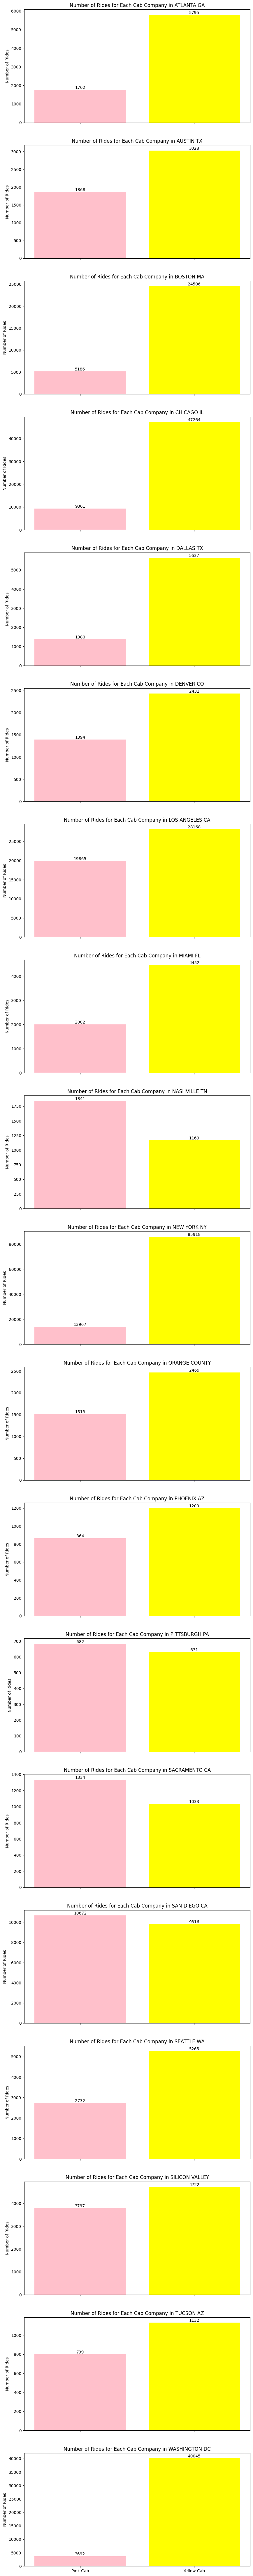

In [69]:
# Checking the total number of rides for each cabs city wise
# Group the data by 'City' and 'Company' and count the number of rides
city_company_counts = final_cab_data.groupby(['City', 'Company']).size().unstack().fillna(0)

# Create a bar chart for each city
cities = city_company_counts.index
num_cities = len(cities)

# Define colors for each company
company_colors = {'Yellow Cab': 'yellow', 'Pink Cab': 'pink'}

# Set up the subplots
fig, axs = plt.subplots(num_cities, 1, figsize=(10, 6 * num_cities), sharex=True)

for i, city in enumerate(cities):
    city_data = city_company_counts.loc[city]

    # Create bars for Yellow Cab and Pink Cab
    x = range(len(city_data))
    axs[i].bar(x, city_data, color=[company_colors[company] for company in city_data.index])
    axs[i].set_ylabel('Number of Rides')
    axs[i].set_title(f'Number of Rides for Each Cab Company in {city}')

    # Add labels (indicators) above the bars
    for j, count in enumerate(city_data):
        axs[i].text(j, count, str(count), ha='center', va='bottom')

# Set x-axis tick labels as company names
plt.xticks(x, city_data.index)
plt.show()


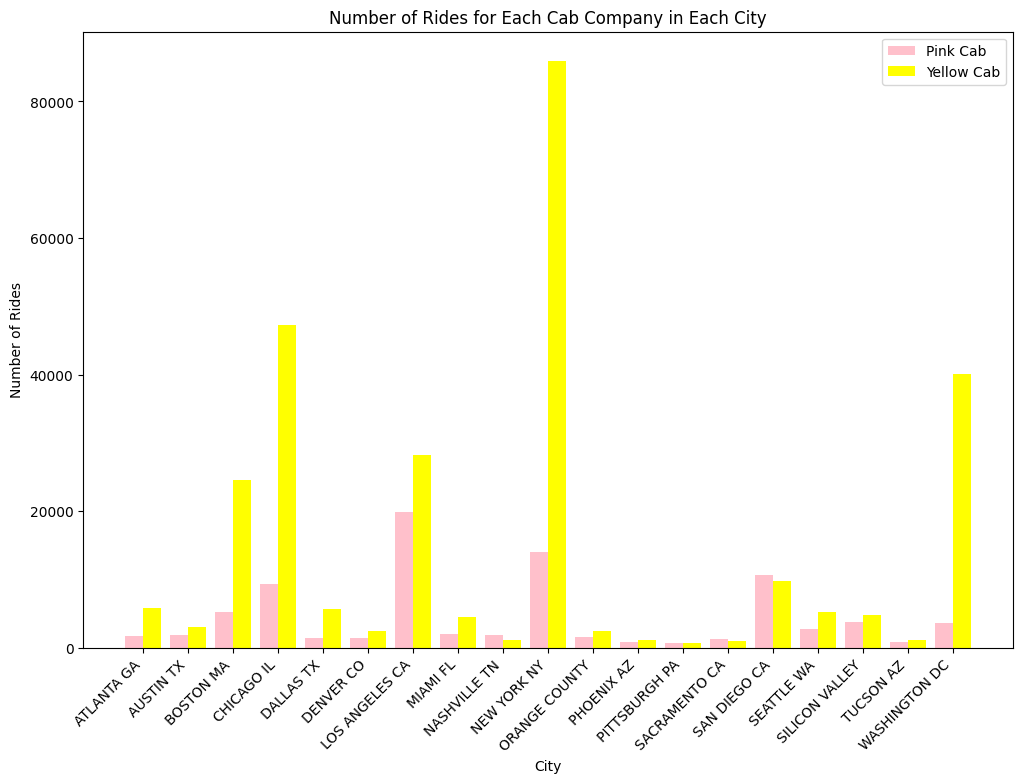

In [70]:
#number of rides for each cab company city wise
# Group the data by 'City' and 'Company' and count the number of rides
rides_by_city_company = final_cab_data.groupby(['City', 'Company']).size().unstack(fill_value=0)

# Define cities and companies
cities = rides_by_city_company.index
companies = rides_by_city_company.columns

# Define colors for each company
company_colors = {'Yellow Cab': 'yellow', 'Pink Cab': 'pink'}

# Create a grouped bar chart for the number of rides by city and company
num_cities = len(cities)
x = np.arange(num_cities)
bar_width = 0.4

plt.figure(figsize=(12, 8))

for i, company in enumerate(companies):
    company_data = rides_by_city_company[company]
    plt.bar(x + i * bar_width, company_data, bar_width, label=company, color=company_colors[company])

plt.xlabel('City')
plt.ylabel('Number of Rides')
plt.title('Number of Rides for Each Cab Company in Each City')
plt.xticks(x + bar_width * (len(companies) - 1) / 2, cities, rotation=45, ha='right')
plt.legend()


plt.show()


###Outliers:
Pink cab has got more number of rides when compared to yellow cabs in cities like
*  Nashville TN(Pink cab:1841, Yellow cab:1169)
*  Pittsburgh PA(Pink cab:682, Yellow cab: 631)
*  Sacramento CA(Pink cab:1134, Yellow cab:1033)
*  San Deigo CA(Pink cab:10672, Yellow cab:9816)

These exceptions we can ignore when compared to the yellow cab rides in other major cities.




**Check the Total Revenue generated by each cabs**




In [71]:
#Check the total revenue generated by each cabs

# Calculate the total revenue for Yellow Cab
yellow_cab_revenue = final_cab_data[final_cab_data['Company'] == 'Yellow Cab']['Price Charged'].sum()

# Calculate the total revenue for Pink Cab
pink_cab_revenue = final_cab_data[final_cab_data['Company'] == 'Pink Cab']['Price Charged'].sum()

# Compare the total revenues
print(f"Total Revenue for Yellow Cab: ${yellow_cab_revenue:.2f}")
print(f"Total Revenue for Pink Cab: ${pink_cab_revenue:.2f}")

# Make a comparison
if yellow_cab_revenue > pink_cab_revenue:
    print("Yellow Cab has higher revenue.")
elif yellow_cab_revenue < pink_cab_revenue:
    print("Pink Cab has higher revenue.")
else:
    print("Both Yellow Cab and Pink Cab have the same revenue.")


Total Revenue for Yellow Cab: $125853887.19
Total Revenue for Pink Cab: $26328251.33
Yellow Cab has higher revenue.


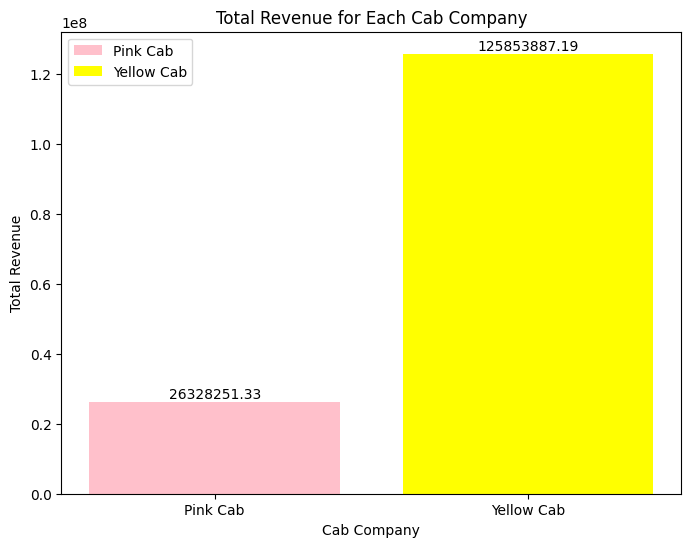

In [72]:
# Calculate the total revenue generated by each cabs
final_cab_data['Revenue'] = final_cab_data['Price Charged']

# Group the data by 'Company' and sum the profit
revenue_by_company = final_cab_data.groupby('Company')['Revenue'].sum()

# Define labels for the legend
legend_labels = ['Pink Cab', 'Yellow Cab']

# Create a bar chart to visualize profit for each cab company
plt.figure(figsize=(8, 6))
bars = plt.bar(revenue_by_company.index, revenue_by_company.values, color=['pink','yellow'])
plt.xlabel('Cab Company')
plt.ylabel('Total Revenue')
plt.title('Total Revenue for Each Cab Company')
plt.legend(bars, legend_labels)


# Add labels (indicators) above the bars
for bar, count in zip(bars, revenue_by_company):
    plt.text(bar.get_x() + bar.get_width() / 2, count, str(count), ha='center', va='bottom')



**Check the Total Revenue generated by each cabs city wise**




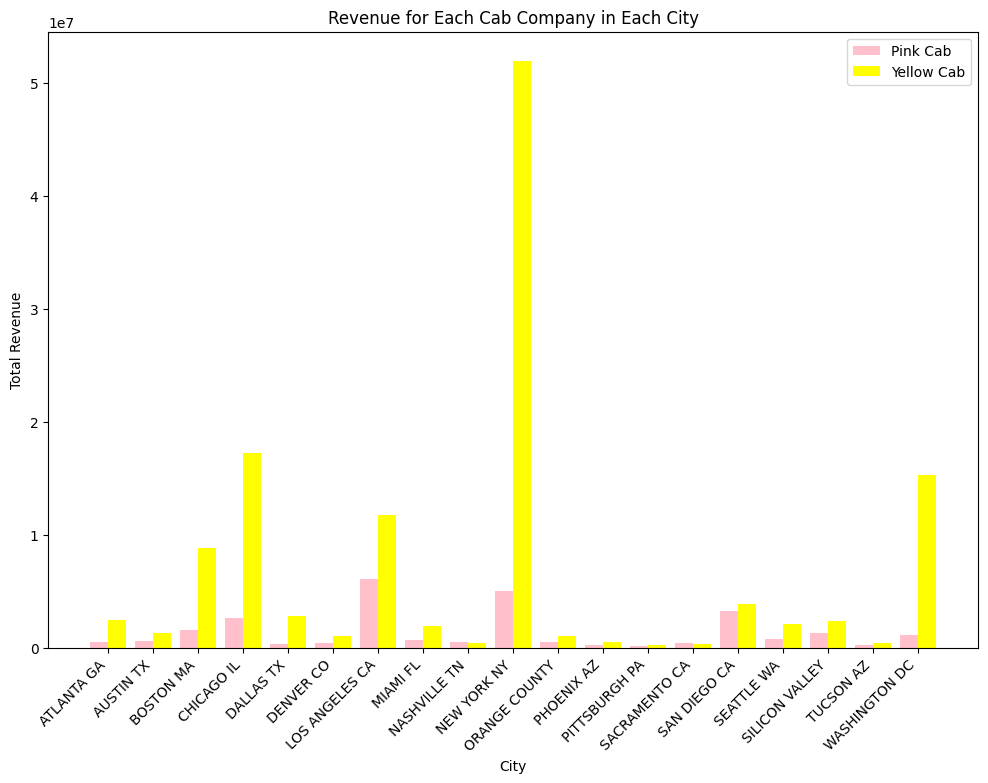

In [73]:
#Total revenue for each cab city wise

# Group the data by 'City' and 'Company' and sum the revenue
revenue_by_city_company = final_cab_data.groupby(['City', 'Company'])['Price Charged'].sum().unstack(fill_value=0)

# Define cities and companies
cities = revenue_by_city_company.index
companies = revenue_by_city_company.columns

# Define colors for each company
company_colors = {'Yellow Cab': 'yellow', 'Pink Cab': 'pink'}

# Create a grouped bar chart for revenue by city and company
num_cities = len(cities)
x = np.arange(num_cities)
bar_width = 0.4

plt.figure(figsize=(12, 8))

for i, company in enumerate(companies):
    company_data = revenue_by_city_company[company]
    plt.bar(x + i * bar_width, company_data, bar_width, label=company, color=company_colors[company])

plt.xlabel('City')
plt.ylabel('Total Revenue')
plt.title('Revenue for Each Cab Company in Each City')
plt.xticks(x + bar_width * (len(companies) - 1) / 2, cities, rotation=45, ha='right')
plt.legend()

plt.show()


**Check the Profit Earned by each cabs**




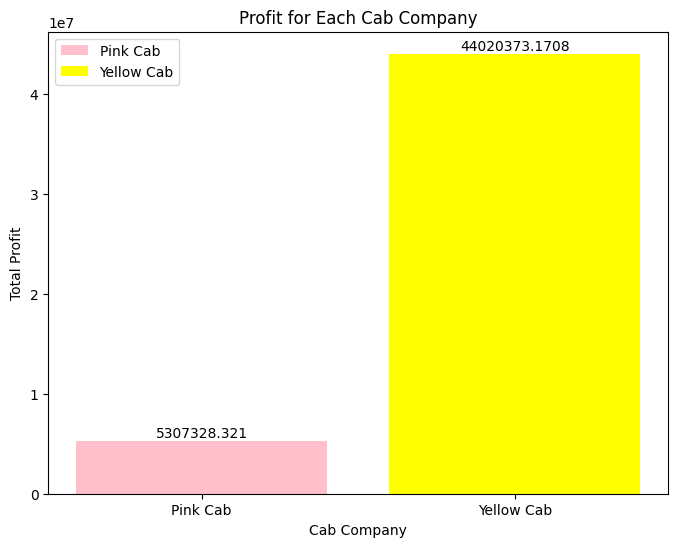

In [74]:
# Calculate profit earned by each cab companies
final_cab_data['Profit'] = final_cab_data['Price Charged'] - final_cab_data['Cost of Trip']

# Group the data by 'Company' and sum the profit
profit_by_company = final_cab_data.groupby('Company')['Profit'].sum()

# Define labels for the legend
legend_labels = ['Pink Cab','Yellow Cab']

# Create a bar chart to visualize profit for each cab company
plt.figure(figsize=(8, 6))
bars = plt.bar(profit_by_company.index, profit_by_company.values, color=[ 'pink','yellow'])
plt.xlabel('Cab Company')
plt.ylabel('Total Profit')
plt.title('Profit for Each Cab Company')
plt.legend(bars, legend_labels)


# Add labels (indicators) above the bars
for bar, count in zip(bars, profit_by_company):
    plt.text(bar.get_x() + bar.get_width() / 2, count, str(count), ha='center', va='bottom')



**Check the Profit Earned by each cabs City wise**




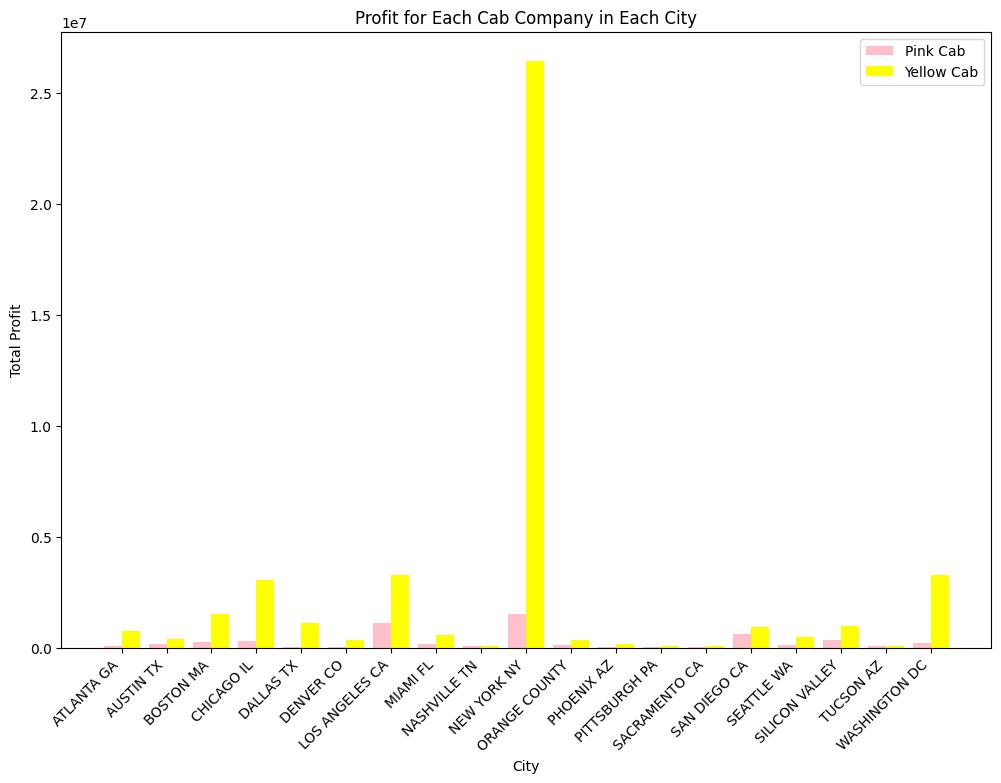

In [75]:
# Calculate profit for each ride
final_cab_data['Profit'] = final_cab_data['Price Charged'] - final_cab_data['Cost of Trip']

# Group the data by 'City' and 'Company' and sum the profit
profit_by_city_company = final_cab_data.groupby(['City', 'Company'])['Profit'].sum().unstack(fill_value=0)

# Define cities and companies
cities = profit_by_city_company.index
companies = profit_by_city_company.columns

# Define colors for each company
company_colors = {'Yellow Cab': 'yellow', 'Pink Cab': 'pink'}

# Create a grouped bar chart for profit by city and company
num_cities = len(cities)
x = np.arange(num_cities)
bar_width = 0.4

plt.figure(figsize=(12, 8))

for i, company in enumerate(companies):
    company_data = profit_by_city_company[company]
    plt.bar(x + i * bar_width, company_data, bar_width, label=company, color=company_colors[company])

plt.xlabel('City')
plt.ylabel('Total Profit')
plt.title('Profit for Each Cab Company in Each City')
plt.xticks(x + bar_width * (len(companies) - 1) / 2, cities, rotation=45, ha='right')
plt.legend()

plt.show()


**Check the Kilometres travelled by each cabs**




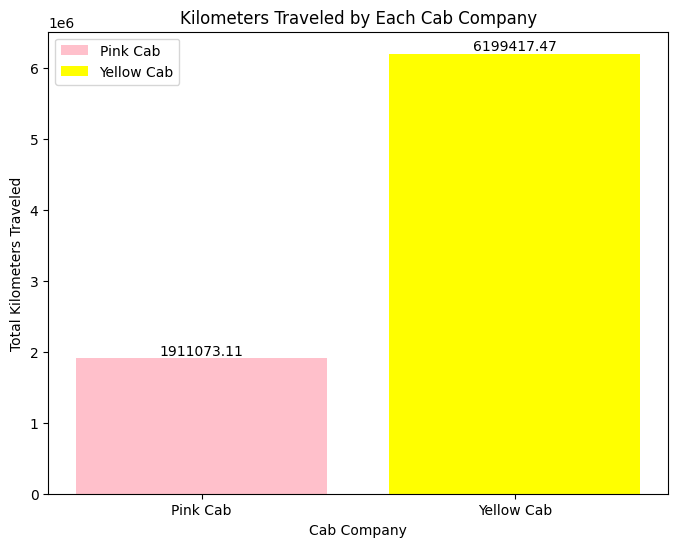

In [76]:
#kms travelled by each cab
import matplotlib.pyplot as plt

# Group the data by 'Company' and calculate the total kilometers traveled
kilometers_traveled = final_cab_data.groupby('Company')['KM Travelled'].sum()


# Create a bar chart to visualize kilometers traveled by each cab
plt.figure(figsize=(8, 6))
bars = plt.bar(kilometers_traveled.index, kilometers_traveled.values, color=['pink', 'yellow'])
plt.xlabel('Cab Company')
plt.ylabel('Total Kilometers Traveled')
plt.title('Kilometers Traveled by Each Cab Company')
plt.legend(bars, legend_labels)

# Annotate each bar with its value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()





**Check the Kilometres travelled by each cabs city wise**




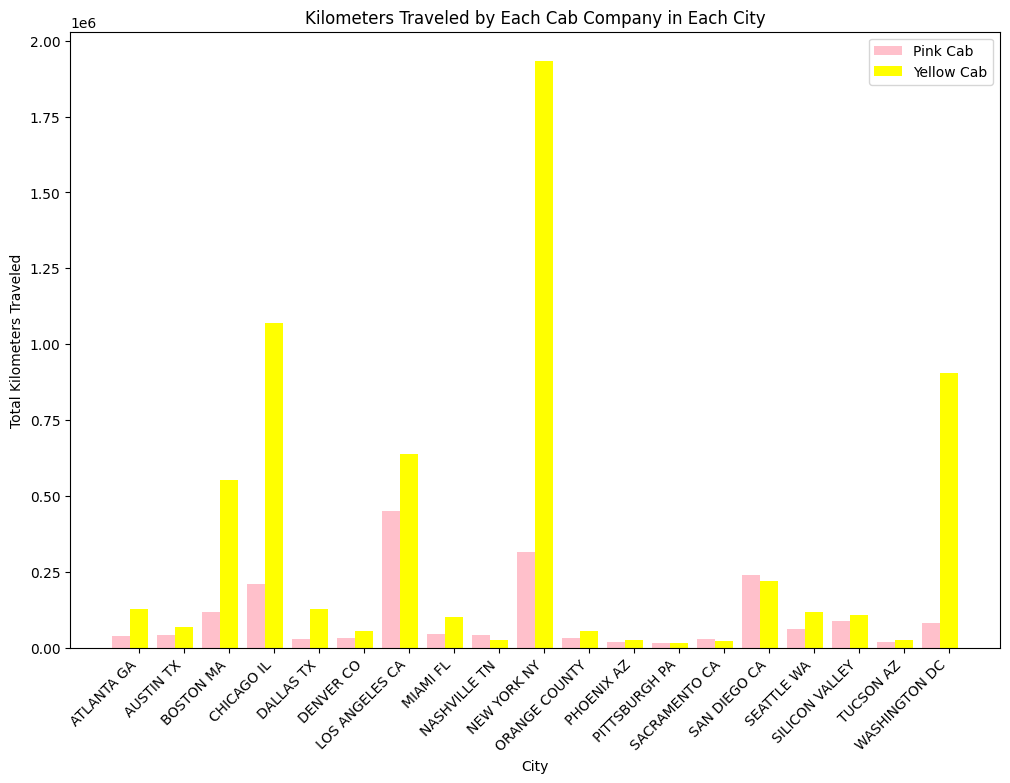

In [77]:
#Kms travelled by each cab in each city

# Group the data by 'City' and 'Company' and calculate the total kilometers traveled
kilometers_traveled_citywise = final_cab_data.groupby(['City', 'Company'])['KM Travelled'].sum().unstack(fill_value=0)

# Define the colors for 'Yellow Cab' and 'Pink Cab'
company_colors = {'Yellow Cab': 'yellow', 'Pink Cab': 'pink'}

# Create a grouped bar chart to visualize kilometers traveled by each cab company city-wise
plt.figure(figsize=(12, 8))

# Get the cities and companies
cities = kilometers_traveled_citywise.index
companies = kilometers_traveled_citywise.columns

x = range(len(cities))
bar_width = 0.4

for i, company in enumerate(companies):
    company_data = kilometers_traveled_citywise[company]
    plt.bar([pos + i * bar_width for pos in x], company_data, bar_width, label=company, color=company_colors[company])

plt.xlabel('City')
plt.ylabel('Total Kilometers Traveled')
plt.title('Kilometers Traveled by Each Cab Company in Each City')
plt.xticks([pos + bar_width for pos in x], cities, rotation=45, ha='right')
plt.legend()

plt.show()


**Check the Average Profit per Kilometre of each cab**




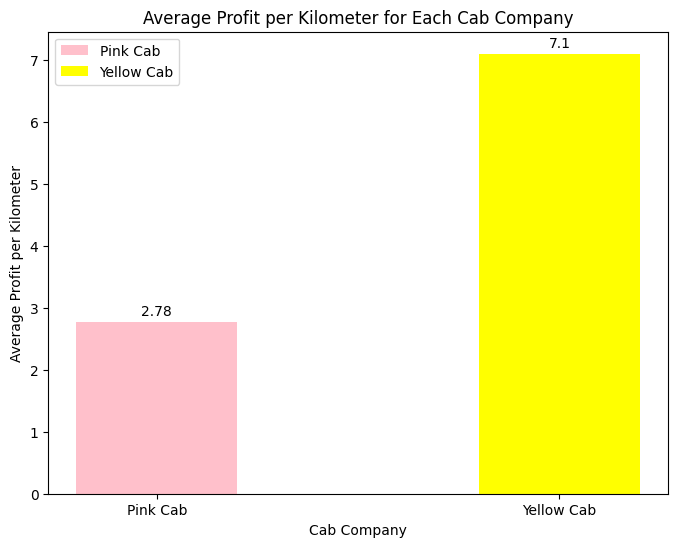

In [78]:
#Avg Profit per KM

# Calculate profit for each ride
final_cab_data['Profit'] = final_cab_data['Price Charged'] - final_cab_data['Cost of Trip']

# Calculate the average profit per kilometer for each cab company
avg_profit_per_km = final_cab_data.groupby('Company')['Profit'].mean() / final_cab_data.groupby('Company')['KM Travelled'].mean()

# Define the colors for 'Yellow Cab' and 'Pink Cab'
company_colors = {'Yellow Cab': 'yellow', 'Pink Cab': 'pink'}

# Create a bar chart to visualize the average profit per kilometer for each cab company
plt.figure(figsize=(8, 6))

# Get the companies and values
companies = avg_profit_per_km.index
values = avg_profit_per_km.values

x = range(len(companies))
bar_width = 0.4

for i, company in enumerate(companies):
    plt.bar(x[i], values[i], bar_width, label=company, color=company_colors[company])
    plt.text(x[i], values[i] + 0.05, round(values[i], 2), ha='center', va='bottom')

plt.xlabel('Cab Company')
plt.ylabel('Average Profit per Kilometer')
plt.title('Average Profit per Kilometer for Each Cab Company')
plt.xticks(x, companies)
plt.legend()

plt.show()


**To check the customer retention in choosing the same cab for atleast 5 rides**

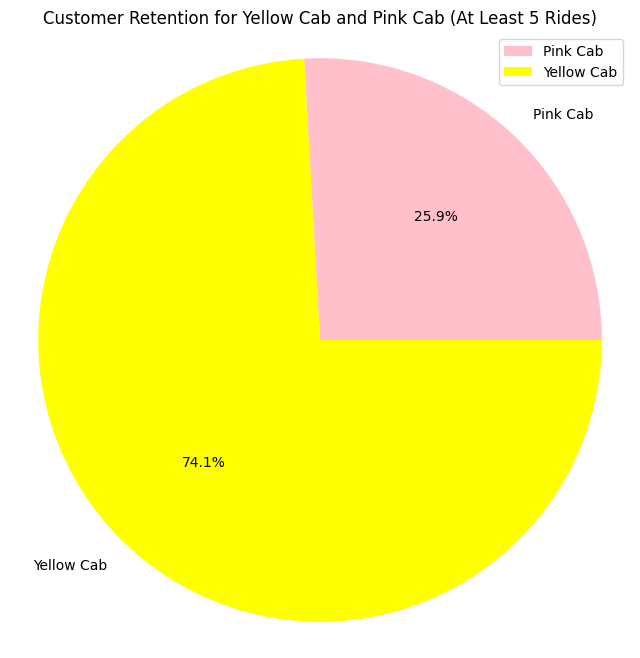

In [79]:
#To check the customer retention for the same cab for atleast 5 rides

# Assuming you have a dataset named 'final_cab_data' with columns 'Customer ID' and 'Company'

# Count the number of rides taken by each customer with each cab company
customer_ride_counts = final_cab_data.groupby(['Customer ID', 'Company']).size().reset_index(name='Rides')

# Filter for customers who have taken the same cab at least 5 times
loyal_customers = customer_ride_counts[customer_ride_counts['Rides'] >= 5]

# Count the number of loyal customers for each cab company
loyal_customer_counts = loyal_customers.groupby('Company')['Customer ID'].nunique()

# Create a pie chart to visualize customer retention
plt.figure(figsize=(8, 8))
plt.pie(loyal_customer_counts, labels=loyal_customer_counts.index, autopct='%1.1f%%', colors=['pink', 'yellow'])
plt.title('Customer Retention for Yellow Cab and Pink Cab (At Least 5 Rides)')
plt.legend()
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

plt.show()




**To check the customer retention in choosing the same cab for atleast 5 rides**

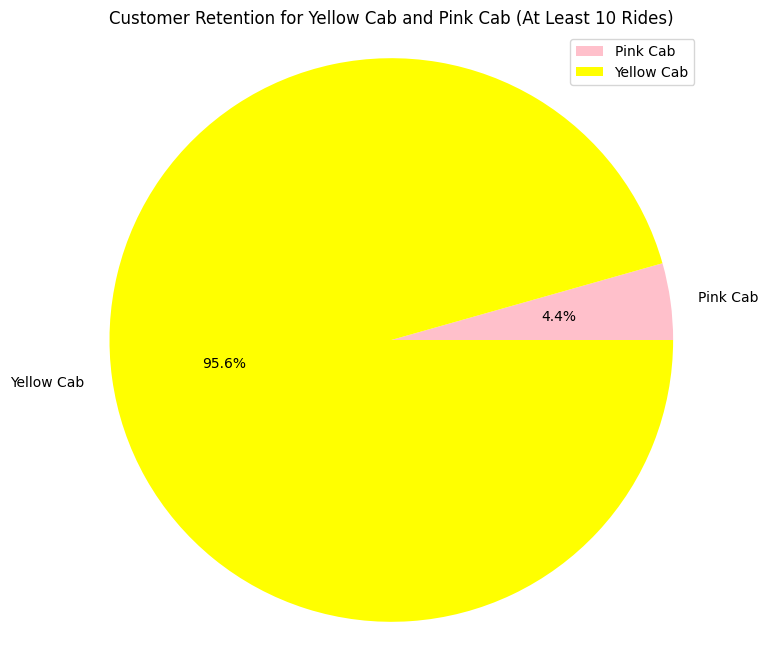

In [80]:
#To check the customer retention for the same cab for atleast 10 rides

# Assuming you have a dataset named 'final_cab_data' with columns 'Customer ID' and 'Company'

# Count the number of rides taken by each customer with each cab company
customer_ride_counts = final_cab_data.groupby(['Customer ID', 'Company']).size().reset_index(name='Rides')

# Filter for customers who have taken the same cab at least 5 times
loyal_customers = customer_ride_counts[customer_ride_counts['Rides'] >= 10]

# Count the number of loyal customers for each cab company
loyal_customer_counts = loyal_customers.groupby('Company')['Customer ID'].nunique()

# Create a pie chart to visualize customer retention
plt.figure(figsize=(8, 8))
plt.pie(loyal_customer_counts, labels=loyal_customer_counts.index, autopct='%1.1f%%', colors=['pink', 'yellow'])
plt.title('Customer Retention for Yellow Cab and Pink Cab (At Least 10 Rides)')
plt.legend()
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

plt.show()




In [ ]:
Yellow cab is reccomended